## Diabetes dataset- KNN, Naive Bayes and added Logistic regression

Preface

In this report, we explore the application of machine learning techniques to the analysis of the diabetes dataset. Diabetes is a prevalent chronic condition that affects millions of individuals worldwide, therefore, making accurate predictions and diagnosis is crucial for effective management and treatment of the disease. The dataset contains a comprehensive set of features related to health metrics and patient information, making it a valuable resource for developing predictive models for diabetes diagnosis.
Throughout this report, we examine three distinct machine learning models applied to the diabetes dataset: Logistic Regression, Naive Bayes, and K-Nearest Neighbors (KNN) classification. Each model offers unique advantages and approaches to predicting diabetes, allowing us to compare their performance and identify the most effective approach.
The dataset we chose contains information related to diabetes diagnosis, including physiological measurements and patient outcomes. Our objective is to develop predictive models capable of accurately classifying patients as either diabetic or non-diabetic based on their features.

CRISP Model Approach

The Cross-Industry Standard Process for Data Mining (CRISP-DM) is a widely used framework for conducting data mining and machine learning projects. It comprises six main phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. Here is how each phase of the CRISP-DM framework was applied to prepare and conduct the analysis presented in this report:
1.	Business Understanding:
•	Before delving into the analysis, it was essential to understand the project objective and the problem at hand. In this case, the goal was to develop predictive models to identify individuals at risk of diabetes based on their demographic and clinical features.
2.	Data Understanding:
•	The dataset 'KNN_diabetes,' was examined to understand its structure and content. It contains eight features (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Diabetes Pedigree, and Age) and one target variable (Outcome). Descriptive statistics were used to gain insights into the distribution and relationships among the variables.
3.	Data Preparation:
•	Data preprocessing steps, such as value normalization, and splitting the dataset into the training and testing splits were performed to ensure that the machine learning models have a strong base for learning.
4.	Modeling:
•	Three machine learning models were selected for building predictive models: Logistic Regression, Naive Bayes, and K-Nearest Neighbors (KNN) Classification. Each model was trained using the preprocessed dataset to predict the likelihood of diabetes based on the given features.
5.	Evaluation:
•	The performance of each model was evaluated using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and the confusion matrix. Cross-validation techniques were employed to ensure the robustness of the models and draw insights into the accuracy of the models.
6.	Deployment:
•	While the primary focus of this report is on model development and evaluation, considerations for model deployment and operationalization are briefly discussed. Recommendations for deploying the best-performing model in a real-world setting are outlined, along with potential challenges and future directions.


## k-Nearest neighbours

Firtsly, i installed and imported all of the libraries i will use in my project (if i will need more, i will install them during the project

In [29]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Next is loading the dataset I need, which is Diabetes dataset, that should predict, if the person has diabetes or not. I will add also df.head() adn df.info(), so i can see, what data i have. What rows and columns and what type of data.

In [30]:
df = pd.read_csv(r"C:\Users\Lucka\OneDrive - Vysoká škola ekonomická v Praze\Plocha\MDD\Introduction to data mining\KNN-diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


From this table, i can see that we will work with columns: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Now i can visualize the data set to see, if we can see some connection beetwen our values.

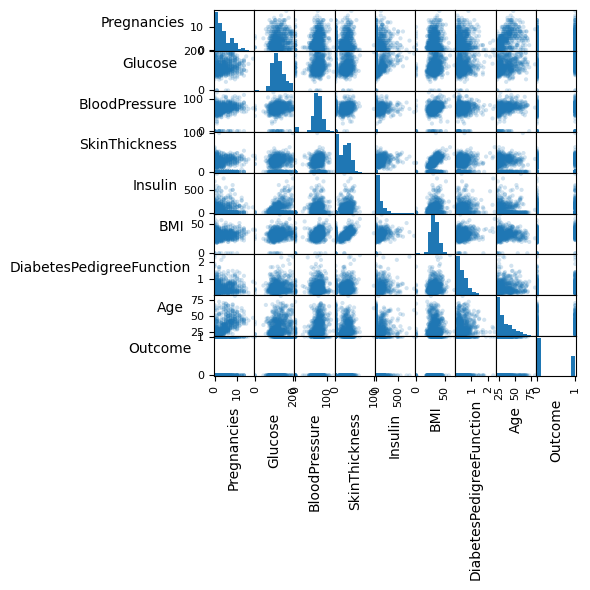

In [32]:
# Create scatter matrix for all columns in the DataFrame
fig = scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="hist")

# Adjust labels
for ax in fig.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")

# Adjust layout
plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)

# Show the plot
plt.show()

we can see, that some of the graphs shows that the values are dependent on each other and that there is connection, but it does not says us a lot.

Because there are not any missing values or columns i will not use, i can skip cleaning the data, because they are already clean.
Now i will count the number of people with and without diabetes. That means the value Outcome, 1 means that the person has diabetes, 0 means that does not.

In [33]:
cntDiag = df["Outcome"].value_counts()
#propDiag = df["Outcome"].value_counts(normalize=True)
cntDiag
#propDiag

Outcome
0    500
1    268
Name: count, dtype: int64

Now i will normalize the values, so we can count with them in the knn. Without it, knn would not work properly, because the vaules of each colum are in different size and the classification will not be clear because of this.

In [34]:
def normalize(x):
    return (x - min(x)) / (
        max(x) - min(x)
    )  # distance of item value - minimum vector value divided by the range of all vector values


testSet1 = np.arange(1, 6)
testSet2 = np.arange(1, 6) * 10


print(f"testSet1: {testSet1}\n")
print(f"testSet2: {testSet2}\n")
print(f"Normalized testSet1: {normalize(testSet1)}\n")
print(f"Normalized testSet2: {normalize(testSet2)}\n")

testSet1: [1 2 3 4 5]

testSet2: [10 20 30 40 50]

Normalized testSet1: [0.   0.25 0.5  0.75 1.  ]

Normalized testSet2: [0.   0.25 0.5  0.75 1.  ]



When we have the test normalization done, we can apply it to the whole dataset

In [35]:
excluded = ["Outcome"]  # list of columns to exclude
X = df.drop(excluded, axis=1)
X = X.apply(normalize, axis=0)
print(X)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

We can see, that the data now are in the one format and it is easier to work with them. Now I will split data into train and test ones, which is needed for the KNN classification and also for other models we will do.

In [36]:
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,0.058824,0.477387,0.491803,0.181818,0.068558,0.356185,0.077711,0.016667
139,0.294118,0.527638,0.590164,0.292929,0.384161,0.549925,0.034586,0.116667
485,0.000000,0.678392,0.557377,0.424242,0.295508,0.630402,0.122545,0.050000
547,0.235294,0.658291,0.557377,0.212121,0.196217,0.493294,0.035013,0.116667
18,0.058824,0.517588,0.245902,0.383838,0.098109,0.645306,0.044833,0.200000


As i have data split i can start doing the KNN classification. Here I do the prediction on the test set first.

In [37]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.iloc[:,:15], y_train)

y_pred = knn.predict((X_test.iloc[:,:15]))
print(y_pred)

[0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 0 0 0 0 0]


In [38]:
print(y_test)

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64


Now i will do the confusion matrix, so i can compare if the predictions are right

In [39]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
print(cm)

[[118  33]
 [ 41  39]]


At the end, i visualise the numbers so i can make the outcome out of it easier.

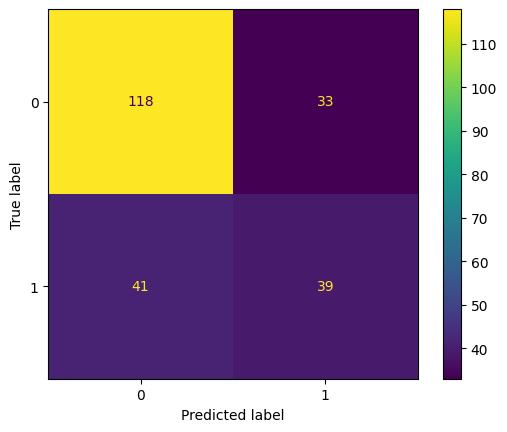

In [40]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

True Positives (TP): 39

False Positives (FP): 33

True Negatives (TN): 118

False Negatives (FN): 41

We can see, that there are a lots of true negatives, which is good. What is not that good and what takes the accuracy of the dataset down is high number of false positives and false negatives, that are almost equal to true positives.

Now i will count accuracy and other sclaes of the model, so i can see, how accurate the model is.


In [41]:
y_test_array = np.array(y_test)

# Now you can reshape the array
print('Classification report:', classification_report(y_test_array.reshape(-1, 1), y_pred))

Classification report:               precision    recall  f1-score   support

           0       0.74      0.78      0.76       151
           1       0.54      0.49      0.51        80

    accuracy                           0.68       231
   macro avg       0.64      0.63      0.64       231
weighted avg       0.67      0.68      0.68       231



Precision:

For class 0 (no diabetes), the precision is 0.74. This means that out of all the instances that the model predicted as not having diabetes, 74% of them were correct.
For class 1 (diabetes), the precision is 0.54. This means that out of all the instances that the model predicted as having diabetes, 54% of them were correct.

Recall:

Recall, also known as sensitivity, measures the ability of the model to find all the relevant cases within a dataset.
For class 0, the recall is 0.78. This means that the model correctly identified 78% of all instances of class 0 (no diabetes).
For class 1, the recall is 0.49. This means that the model correctly identified 49% of all instances of class 1 (diabetes).

The F1-score

F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
For class 0, the F1-score is 0.76.
For class 1, the F1-score is 0.51.


Acuracy

Accuracy measures the overall correctness of the model across all classes.
The overall accuracy of the model is 0.68, which means that 68% of the predictions made by the model are correct.

## Naive Bayes

Because we have already data imported and splited, we will use it also in this model, so we do not have to do it again.

Here I imported the 'GaussianNB' class from the sklearn.naive_bayes module and assigned a name to the Gaussian Naive Bayes model. 'GaussianNB' implements the Gaussian Naive Bayes algorithm, which is commonly used for classification tasks.

In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

This line trains the Gaussian Naive Bayes model on the training data (X_train and y_train). It learns the patterns and relationships between features and the target variable.

In [43]:
model.fit(X_train, y_train)

GaussianNB()

This line predicts the target variable (y_pred) for the testing features (X_test) using the trained model (model). This allows us to evaluate the model's performance on unseen data. By using model.predict(X_test), I am asking the trained model to look at the features in the testing data (X_test) and predict what the corresponding target variable values would be. The predictions are then stored in the variable y_pred, which will be used to evaluate the performance of the model against the actual target variable values (y_test).

In [44]:
y_pred = model.predict(X_test)

Here I imported the metrics module from sklearn, which provides various metrics for evaluating machine learning models.

In [45]:
from sklearn import metrics

I printed the accuracy of the model on the test data. The accuracy score is calculated by comparing the predicted values (y_pred) with the actual values (y_test).

In [46]:
print("Accuracy:", metrics.accuracy_score (y_test, y_pred))

Accuracy: 0.7445887445887446


These lines print a classification report, which provides various metrics such as precision, recall, F1-score, and support for each class. It gives insights into the performance of the model for each class.

In [47]:
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



These lines print a confusion matrix, which is a table showing the counts of true positive, true negative, false positive, and false negative predictions made by the model.

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[119  32]
 [ 27  53]]


Here I graphed the confusion matrix for the visual representation of the results.

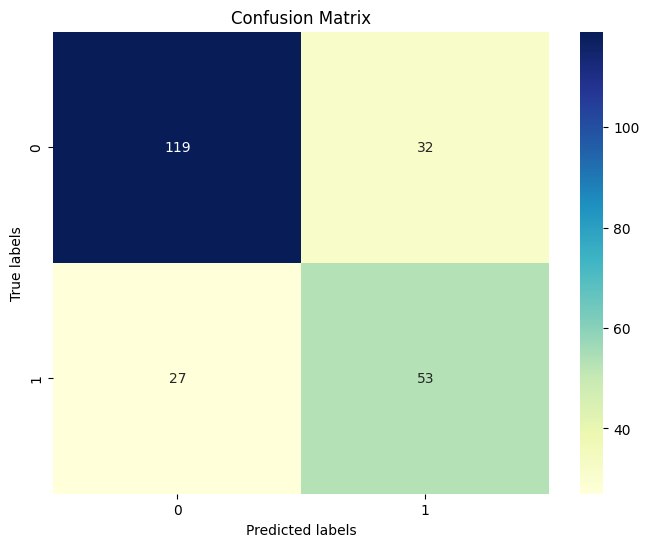

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

Examining the confusion matrix of the Naïve Bayes model we created, we observed the following results: there were 53 instances of True Positives (TP), 119 instances of True Negatives (TN), 32 instances of False positives (FP), 27 instances of False negatives (FN). 
The accuracy of the conducted model is approximately 74%. Precision measures the accuracy of the positive predictions. The precision score of our model is 62%, indicating that among all instances predicted as having diabetes, around 62% were correct. The recall (sensitivity) measure suggests that the model correctly identified around 66% of all actual instances of diabetes. The F1 score is equal to 64%.
The confusion matrix and associated metrics reveal that while the model performs reasonably well in identifying instances of both classes, there is room for improvement, especially in reducing false positives and false negatives. 


## Logistic regression

Because we have the data already splitted into test and train, i will use them also for the logistic regresion below.

In [50]:
#Firts i need to do all of the imports needed
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logistic_reg = LogisticRegression()

# Train the model
logistic_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test_scaled)

# Evaluate the model
print("Classification report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



I also wanted to try, what the accuracy would be without standardizing the data. You can see it below:

In [51]:
# Initialize the Logistic Regression model
logistic_reg = LogisticRegression()

# Train the model
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model
print("Classification report for Logistic Regression:")
print(classification_report(y_test, y_pred))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.66      0.56      0.61        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.75      0.74       231



It was suprising, but the accuracy of data without standardization was better that with it. It went from 74 % to 75 %. That means, that i will work with data without it.
Now i will plot the confusion matrix with the visualisation in the heat map, so i can see it better.

Precision of class 0 (no diabetes)is achieving 79% and class 1 (diabetes) achieving 66%. Recall for class 0 is 85% recall and for class 1 56%. The F1-score, which balances precision and recall, is 0.82 for class 0 and 0.61 for class 1. The overall accuracy of the model is 75%. These metrics collectively indicate the model's effectiveness in distinguishing between individuals with and without diabetes, with room for improvement, especially in the identification of diabetes cases.

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[128  23]
 [ 35  45]]


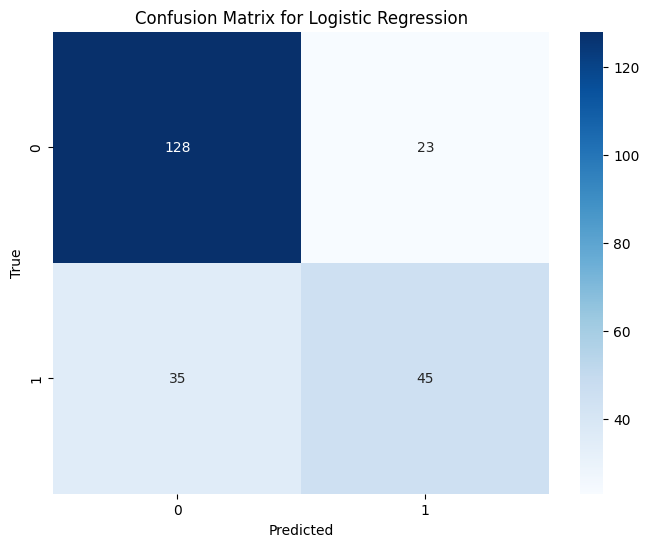

In [53]:
#plotting heat map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

True Positives (TP): 50 

False Positives (FP): 31

True Negatives (TN): 120

False Negatives (FN): 30

We can see clearly, that the number of True positives went up, specially compared to KNN classififation.

Now i will plot also ROC curve, so i can see the discrimination ability of this logistic regression

c:\Users\Lucka\anaconda3\envs\data-science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7981788079470199


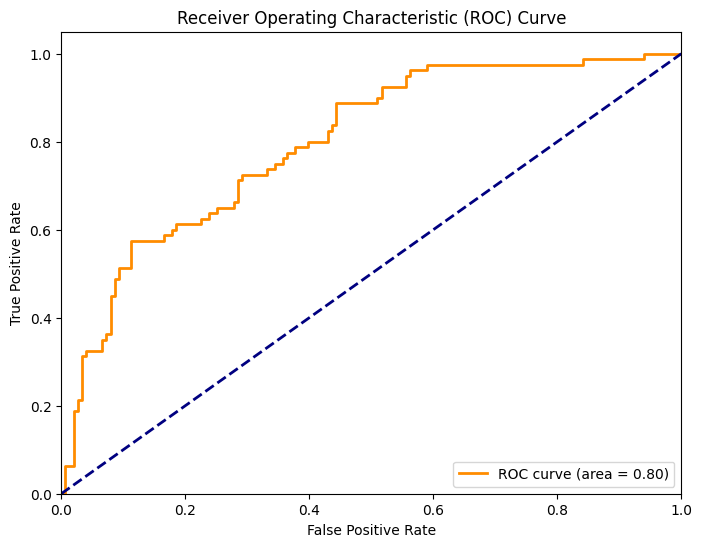

In [54]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

y_prob = logistic_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Values of ROC:
Value of 0.5 suggests that the model's performance is no better than random guessing.

Value closer to 1 indicates that the model has a strong ability to distinguish between the positive and negative classes, with higher values indicating better performance.

Value of 0 indicates that the model's predictions are completely wrong, likely due to a flaw in the model or data.

Value of this ROC is approximately 0.798, that indicates that the logistic regression model is performing reasonably well in distinguishing between individuals with and without diabetes. It suggests that the model has a relatively good discriminatory power, but there may still be room for improvement.

In conclusion we can say, that the accuracy of Logistic regression is slightly higher that the Naive Bayes, but way higher than KNN classification.

## Performance comparison of all models, discussion, and suggestions for next steps
Below is a comprehensive overview detailing the insights and conclusions drawn from each machine-learning model.
1. K-Nearest Neighbors (KNN):
Precision for class 0 (no diabetes) is 74%, and for class 1 (diabetes) is 54%.
Recall for class 0 is 78%, and for class 1 is 49%.
F1-score for class 0 is 76%, and for class 1 is 51%.
Overall accuracy is 68%.
2. Naïve Bayes:
Precision for predicting diabetes is 62%.
Recall for predicting diabetes is 66%.
F1-score is 64%.
Accuracy is approximately 74%.
The model shows room for improvement, particularly in reducing false positives and false negatives.
3. Logistic Regression:
True Positives: 50, False Positives: 31, True Negatives: 120, False Negatives: 30.
ROC value is approximately 79.8%.
The model performs reasonably well in distinguishing between individuals with and without diabetes.
There is potential for further improvement, but the model shows good discriminatory power based on its ROC value.

Logistic Regression outperforms both KNN and Naïve Bayes models, achieving the highest accuracy of approximately 79%. Similarly with Precision and Recall: the Naïve Bayes model shows moderate precision and recall, while Logistic Regression demonstrates a better balance between the two metrics compared to KNN. Naïve Bayes is the simplest model in terms of model complexity, followed by Logistic Regression, while KNN tends to be more computationally intensive.
Regarding overall performance, the Logistic Regression model emerges as the preferred model due to its better accuracy, balanced precision and recall, and good discriminatory power.

In conclusion, while all three models perform well in predicting diabetes, Logistic Regression appears to be the most suitable choice based on its overall performance and interpretability. However, further experimentation and improvement may be necessary to optimize each model's performance. This could be done through cross-validation by, for example, splitting the data into multiple training and testing sets to evaluate performance across different subsets of the data and ensure robustness. Another method for improving the effectiveness and accuracy of the models is external validation. It would be possible to validate the models on other external datasets to assess their generalizability to new data sources or populations. External validation helps ensure that the models are not overfitting to the specific characteristics of the training data, in this case, the dataset.
